## CLASSIFYING TUMORS IN THE BRAIN

Importing pytorch libraries

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Creating the image transformer to input into the data

In [3]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

Loading Training images

In [4]:
train_data = datasets.ImageFolder(
    root='tumor predictor\\Training\\Training',
    transform = transform
)

In [5]:
train_loader = DataLoader(train_data, batch_size=32, shuffle = True)

Visualizing a snippet of the training data

In [6]:
def image(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(train_loader)
images,labels = next(dataiter)

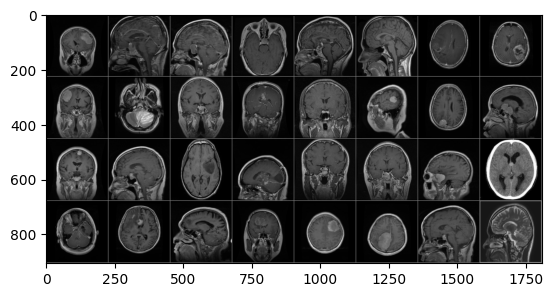

In [7]:
image(torchvision.utils.make_grid(images))

In [8]:
import torch.nn as nn
import torch.optim as optim

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

Creating the structure for the neural network

In [10]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.lin1 = nn.Linear(128*28*28, 512) 
        self.lin2 = nn.Linear(512, 128)
        self.lin3 = nn.Linear(128, 4)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x,2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x,2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x,2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = self.lin3(x)
        return x
    
    
    
model = NeuralNet().to(device)

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training loop

In [ ]:
epochs = 85

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs,labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
print("fin")

check for the  inputs

In [33]:
for i, (inputs, labels) in enumerate(train_loader):
    if i == 0:  # Only check the first batch
        print("First batch labels:", labels)
        break

First batch labels: tensor([0, 3, 3, 0, 1, 0, 0, 0, 3, 3, 3, 2, 1, 1, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
        0, 0, 0, 1, 1, 3, 3, 3])


loading in Testing data

In [34]:
test_data = datasets.ImageFolder(
    root = 'tumor predictor\\Testing\\Testing',
    transform=transform
)

test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

Evaluating the model
> checking the number of correctly classified images

In [35]:
correct = 0
total = 0
model.eval()
with torch.no_grad():   
    for images,labels in test_loader:
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    

In [36]:
accuracy = (correct/total)*100
print(accuracy)

73.60406091370558


Saving the models state dictionary

In [37]:
torch.save(model.state_dict(),'model.pth')
print('model saved successfully')

model saved successfully


model = NeuralNet().to(device)
model.load_state_dict(torch.load('model.pth))
model.eval()